# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman.

## imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from ipywidgets import interact

#### set defaults

In [2]:
sns.set_context('poster')
sns.set_style('ticks')

## get data

In [3]:
dataset = '../data/feelingOld.csv'

In [4]:
dataset

'../data/feelingOld.csv'

In [5]:
df = pd.read_csv(dataset)

In [6]:
df.tail()

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0


### clean up

In [7]:
clean_df = df.drop('Consent', axis=1)
clean_df.loc[:, 'gender'] = [['male', 'female']['fem' in x.lower()]
                             for x in clean_df.loc[:, 'gender']]

In [8]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild
190,5,50,80,23,female,1
191,4,50,60,49,male,2
192,3,70,100,55,female,5
193,5,69,80,69,male,3
194,5,40,60,41,male,0


## transform data

In [9]:
age_bins = list(range(10, 90, 10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [10]:
clean_df.loc[:, 'ageBin'] = pd.cut(clean_df.loc[:, 'age'], bins=age_bins)

In [11]:
clean_df.loc[:, 'oldBeginBin'] = pd.cut(
    clean_df.loc[:, 'oldBegin'], bins=age_bins)

In [12]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin
190,5,50,80,23,female,1,"(20, 30]","(40, 50]"
191,4,50,60,49,male,2,"(40, 50]","(40, 50]"
192,3,70,100,55,female,5,"(50, 60]","(60, 70]"
193,5,69,80,69,male,3,"(60, 70]","(60, 70]"
194,5,40,60,41,male,0,"(40, 50]","(30, 40]"


In [13]:
count_df = clean_df.groupby('ageBin').count()
count_df.loc[:, 'ageBin'] = count_df.index

In [14]:
count_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,oldBeginBin,ageBin
ageBin,,,,,,,,
"(30, 40]",61,61,61,61,61,61,61,"(30, 40]"
"(40, 50]",29,29,29,29,29,29,29,"(40, 50]"
"(50, 60]",22,22,22,22,22,22,22,"(50, 60]"
"(60, 70]",6,6,6,6,6,6,6,"(60, 70]"
"(70, 80]",3,3,3,3,3,3,3,"(70, 80]"


## explore

#### Descriptive Statistics

In [15]:
clean_df.describe()

,ageFeel,oldBegin,oldReally,age,numChild
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,4.025641,48.128205,67.887179,36.805128,0.933333
std,1.237040,12.600891,14.348303,12.116402,1.188721
min,1.000000,20.000000,18.000000,20.000000,0.000000
25%,3.000000,40.000000,60.000000,28.000000,0.000000
50%,4.000000,50.000000,70.000000,33.000000,0.000000
75%,5.000000,60.000000,80.000000,43.500000,2.000000
max,7.000000,80.000000,112.000000,79.000000,5.000000


In [16]:
sns.set_context('paper')

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


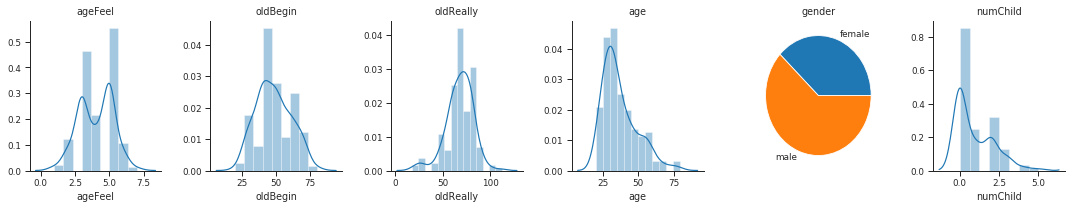

In [17]:
fig = plt.figure(figsize=(20,3))
n_columns = clean_df.columns.shape[-1]
for i,c in enumerate(clean_df.columns[:-2]):
    ax = plt.subplot(1,n_columns,i+1)
    try:
        sns.distplot(clean_df.loc[:,c],ax=ax)
        ax.set_title(c)
        sns.despine()
    except:
        this_df = clean_df.groupby(c).count().mode(axis=1)
        ax.pie(this_df,labels=this_df.index)
        ax.set_title(c)

plt.tight_layout()
plt.show()

In [18]:
sns.set_context('poster')

#### number of cases per age group

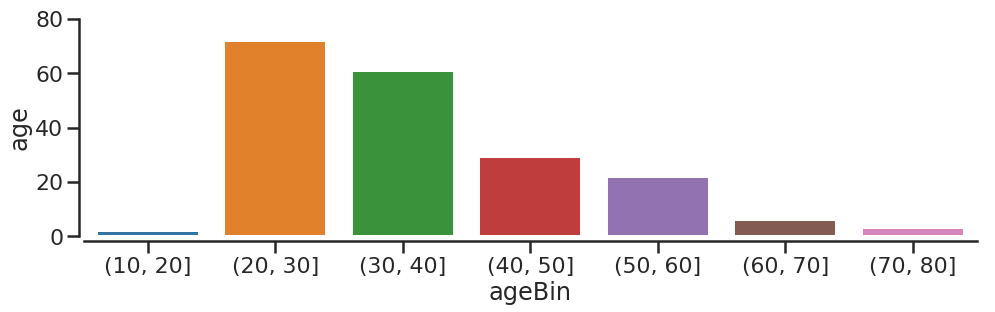

In [19]:
plt.figure(figsize=(16, 4))
sns.barplot(data=count_df, x='ageBin', y='age')
sns.despine(offset=5)
plt.ylim(0, 80)
plt.show()

#### split by gender

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


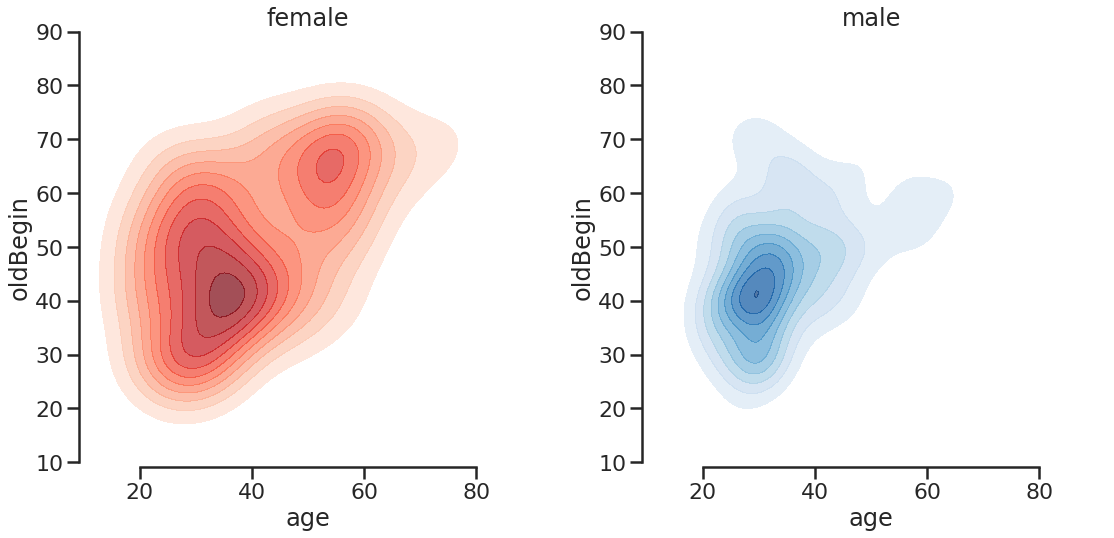

In [20]:
fig = plt.figure(figsize=(16, 8))

for i, g in enumerate(['female', 'male']):
    ax = plt.subplot(1, 2, i + 1)
    this_df = clean_df[clean_df.loc[:, 'gender'] == g]
    sns.kdeplot(
        this_df.loc[:, 'age'],
        this_df.loc[:, 'oldBegin'],
        cmap={
            'female': 'Reds',
            'male': 'Blues'
        }[g],
        shade=True,
        shade_lowest=False,
        alpha=0.7,
        label=g,
        ax=ax)
    ax.set_xlim(10, 90)
    ax.set_ylim(10, 90)
    ax.set_title(g)
    sns.despine(trim=True, offset=5)
plt.tight_layout()
plt.show()

## modelling

### counting proportions

In [21]:
num_df = pd.DataFrame(
    clean_df.groupby(['ageBin', 'oldBeginBin']).count().loc[:, 'age']).copy()

In [22]:
num_df.tail()

age
ageBin   oldBeginBin     
(70, 80] (30, 40]     NaN
         (40, 50]     NaN
         (50, 60]     1.0
         (60, 70]     1.0
         (70, 80]     1.0

In [23]:
num_df = num_df.unstack().T.loc['age', :]

In [24]:
num_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",NaN,1.0,NaN,NaN,NaN,NaN,NaN
"(20, 30]",NaN,19.0,5.0,NaN,NaN,NaN,NaN
"(30, 40]",1.0,25.0,19.0,6.0,1.0,NaN,NaN
"(40, 50]",1.0,13.0,24.0,12.0,3.0,NaN,NaN
"(50, 60]",NaN,9.0,8.0,5.0,10.0,3.0,1.0
"(60, 70]",NaN,4.0,5.0,6.0,8.0,3.0,1.0
"(70, 80]",NaN,1.0,NaN,NaN,NaN,NaN,1.0


#### raw counts

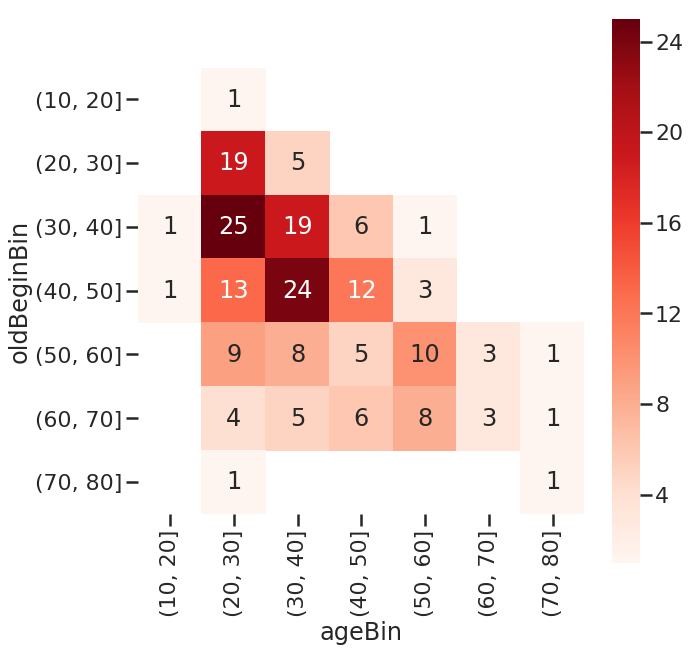

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(num_df, square=True, annot=True, cmap='Reds')
plt.show()

#### transform into percentages

In [26]:
percent_df = ((num_df / num_df.sum(axis=0)) * 100).T.copy()

In [27]:
percent_df

oldBeginBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ageBin,,,,,,,
"(10, 20]",NaN,NaN,50.000000,50.000000,NaN,NaN,NaN
"(20, 30]",1.388889,26.388889,34.722222,18.055556,12.500000,5.555556,1.388889
"(30, 40]",NaN,8.196721,31.147541,39.344262,13.114754,8.196721,NaN
"(40, 50]",NaN,NaN,20.689655,41.379310,17.241379,20.689655,NaN
"(50, 60]",NaN,NaN,4.545455,13.636364,45.454545,36.363636,NaN
"(60, 70]",NaN,NaN,NaN,NaN,50.000000,50.000000,NaN
"(70, 80]",NaN,NaN,NaN,NaN,33.333333,33.333333,33.333333


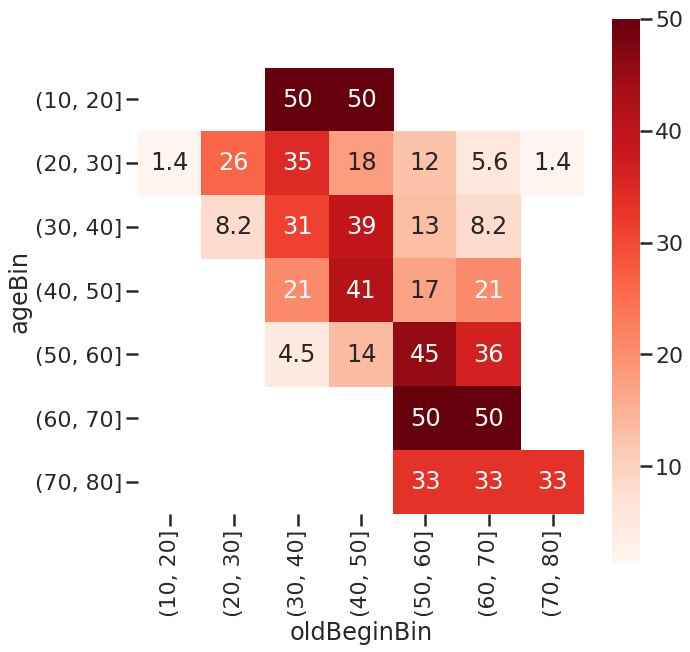

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(percent_df,square=True,annot=True,cmap='Reds')
plt.show()

#### make cumulative distribution

In [29]:
cum_percent_df = percent_df.fillna(0).cumsum(axis=1).T.copy()

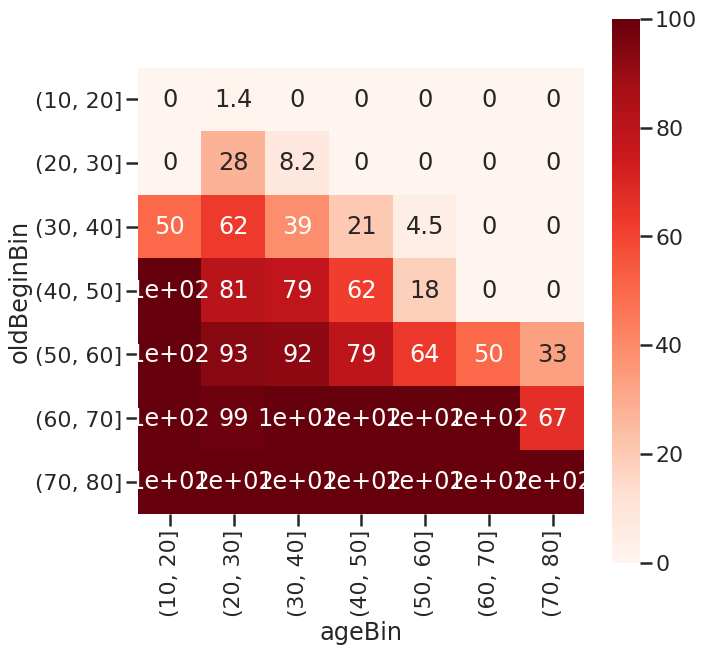

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(cum_percent_df,square=True,annot=True,cmap='Reds')
plt.show()

In [31]:
round_df = np.round(cum_percent_df, 0).astype(int)
round_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",0,1,0,0,0,0,0
"(20, 30]",0,28,8,0,0,0,0
"(30, 40]",50,62,39,21,5,0,0
"(40, 50]",100,81,79,62,18,0,0
"(50, 60]",100,93,92,79,64,50,33
"(60, 70]",100,99,100,100,100,100,67
"(70, 80]",100,100,100,100,100,100,100


## visualize

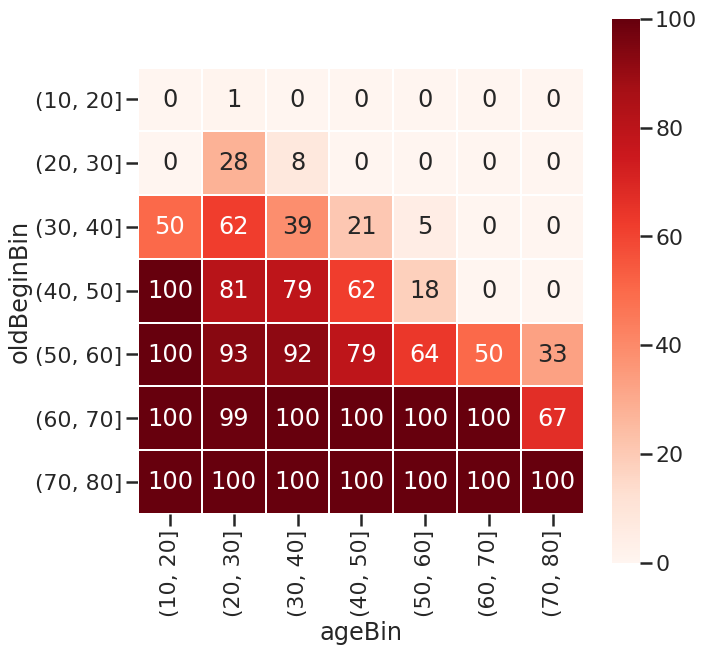

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(
    round_df,
    square=True,
    annot=True,
    cmap='Reds',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    ax=ax)

plt.show()

In [33]:
round_df.index = ['%s-%syrs' % (x.left, x.right) for x in round_df.index]
round_df.columns = ['%s-%syrs' % (x.left, x.right) for x in round_df.columns]

round_df.index.names = ['your age']
round_df.columns.names = ['age of people rating you']

In [34]:
sns.set_context('poster')
sns.set_style('ticks')

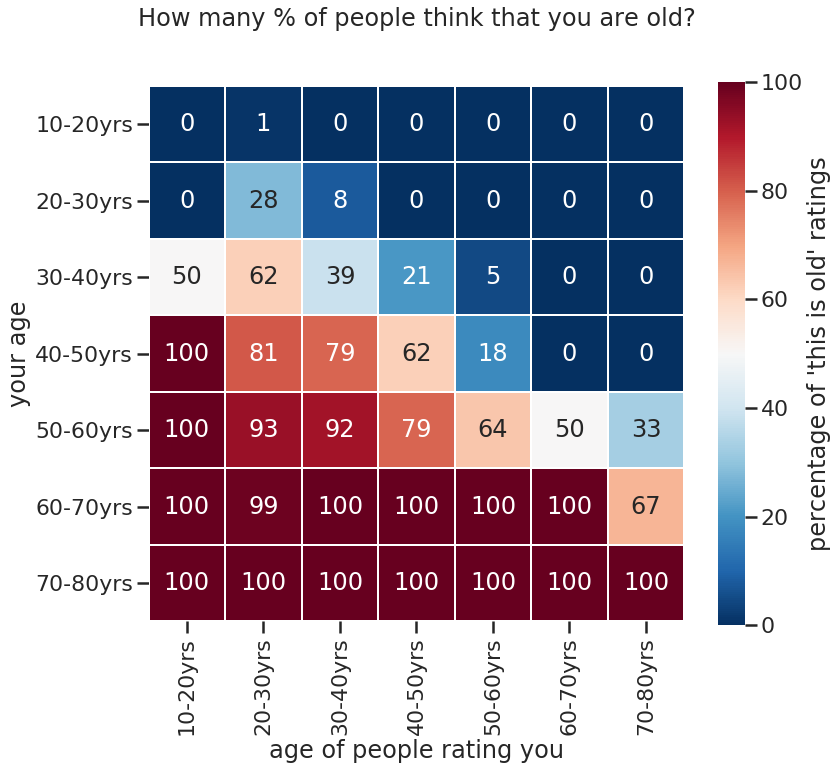

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(
    round_df,
    square=True,
    annot=True,
    cmap='RdBu_r',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    cbar_kws={"label": "percentage of 'this is old' ratings"},
    ax=ax)

plt.title('How many % of people think that you are old?', fontsize=24, y=1.1)
plt.show()

## making sense of the data

We see that as age of the raters increases (x-axis), they are less likely to rate someone as old. As the age of the rated person increases (y-axis), they are more likely to be rated as old.  
The diagonal indicates when someone rates their own age as old: Staring with 40 years, people rate themselves as being old.  
Below the diagonal, people older than oneself are rated as old: The only people who are not rated as old by people younger than themselves are 20-30 year old people (0 % of 10-20 year old people rate them as old).  
Above the diagonal, people younger than oneself are rated as old. The only people who rate younger people as old are 70-80 year old people (rate 67% of the 60-70yrs group as being old).  

Hence, while in general the rule holds that the best predictor of who one rates as old is the age of the rater, the results cannot be wholly explained by a linear effect of age, given that this does not hold true for the groups 20-30yrs (never old) and the 60-70yrs (always old).